# HW3 Predict the Stock
E94041173 張竣佑

In [124]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
from sklearn import preprocessing
train_data = pd.read_csv('./training_data.csv')
test_data = pd.read_csv('./testing_data.csv')
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
print(train_df.head())
print(test_df.head())

          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2009      902.99       931.80      934.73     899.35  4048270080
1  05-Jan-2009      929.17       927.45      936.63     919.53  5413910016
2  06-Jan-2009      931.17       934.70      943.85     927.28  5392620032
3  07-Jan-2009      927.45       906.65      927.45     902.37  4704940032
4  08-Jan-2009      905.73       909.73      910.00     896.81  4991549952
          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2018     2683.73      2695.81     2695.89    2682.36  1846463232
1  03-Jan-2018     2697.85      2713.06     2714.37    2697.77  2090595328
2  04-Jan-2018     2719.31      2723.99     2729.29    2719.07  2100767744
3  05-Jan-2018     2731.33      2743.15     2743.45    2727.92  1918869120
4  08-Jan-2018     2742.67      2747.71     2748.51    2737.60  1894823936


## Analysis Data

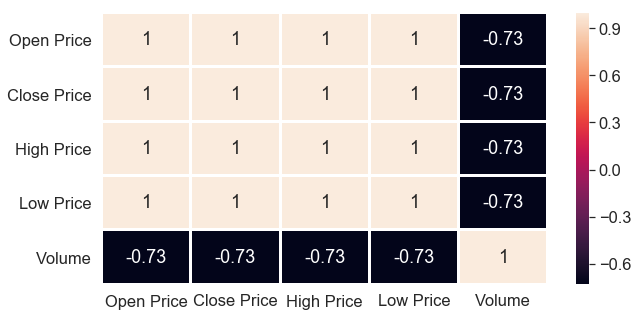

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
sns.set(style="white",font_scale=1.5)
sns.heatmap(train_df.corr(),annot=True,xticklabels=True,linewidth=2)

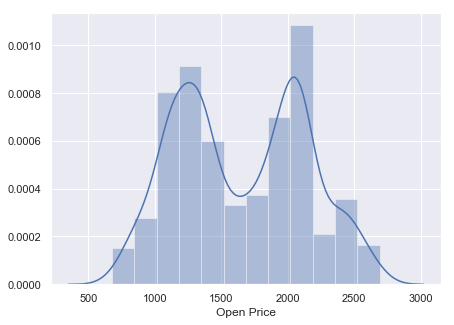

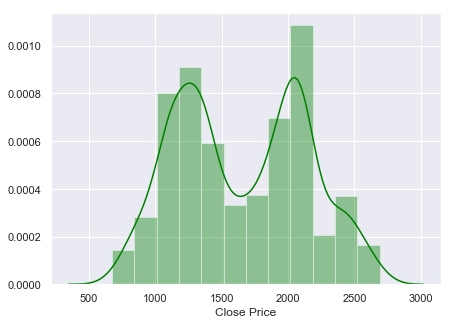

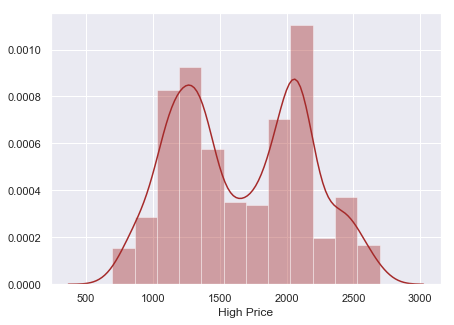

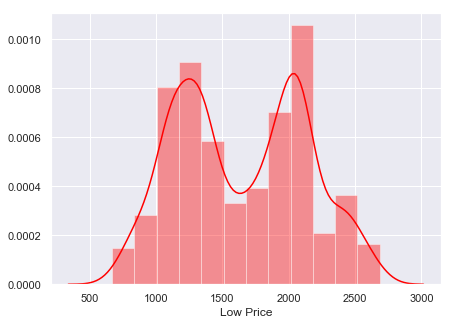

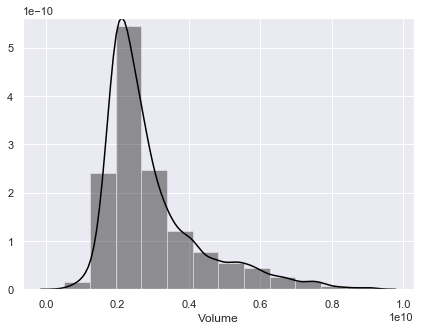

In [127]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(train_df['Open Price'],bins=12)
fig2 = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(train_df['Close Price'],bins=12,color='green')
fig3 = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(train_df['High Price'],bins=12,color='brown')
fig4 = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(train_df['Low Price'],bins=12,color='red')
fig5 = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(train_df['Volume'],bins=12,color='black')

### Prepare Label

In [128]:
train_close = train_df['Close Price']
test_close = test_df['Close Price']
train_diff = np.diff(train_close) >= 0
train_label = train_diff.astype(int)
test_diff = np.diff(test_close) >= 0
test_label = test_diff.astype(int)
train_label = pd.DataFrame(train_label)
test_label = pd.DataFrame(test_label)
print(len(test_label))

251


### Prepare Features

In [129]:
train_f = train_df.drop(['Date','Volume'],axis=1)
train_f = train_f.iloc[:-1]
train_f = pd.DataFrame(train_f)
test_f = test_df.drop(['Date','Volume'],axis=1)
test_f = test_f.iloc[:-1]
test_f = pd.DataFrame(test_f)
print(len(test_f))

251


### LogisticRegression-每預測一筆增加一筆訓練資料

# 使用前一天的open_price、close_price等等共4個值當features

In [133]:
import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression()
model.fit(train_f,train_label)
answer = list()
answer.append(1)
prediction = list()
to_predict = train_df.drop(['Date','Volume'],axis = 1).iloc[-1]
p_label = model.predict(to_predict.reshape(1,-1))
prediction.append(p_label)
train_f = train_f.append(pd.DataFrame([to_predict],columns=['Open Price','Close Price','High Price','Low Price']),ignore_index=True)
train_label = train_label.append(pd.DataFrame([1],columns=[0]),ignore_index=True)
for i in range(len(test_label)):
    model = LogisticRegression()
#     print(len(train_label))
    model.fit(train_f,train_label)
    to_predict = test_f.iloc[i]
    p_label = model.predict(to_predict.reshape(1,-1))
#     print(p_label,test_label.iloc[i][0])
    prediction.append(p_label)
    answer.append(test_label.iloc[i][0])
    train_f = train_f.append(pd.DataFrame([to_predict],columns=['Open Price','Close Price','High Price','Low Price']),ignore_index=True)
    train_label = train_label.append(pd.DataFrame([test_label.iloc[i][0]],columns=[0]),ignore_index=True)
# print(answer,prediction)
accuracy_score(answer,prediction)

0.5983202715819369